# The Heapsort

In [1]:
# Imports
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
import copy

## Definition of a rooted binary tree
To define a rooted binary tree, it is important to understand what a tree is, so we will begin with defining a tree as regards graph theory:

A tree is an undirected graph in which there is always one path between any of its points:

<B>Undirected:</B> In this context, undirected means that each connection between vertices is bidirectional (i.e. if p<sup>1</sup> is connected to p<sup>2</sup> then p<sup>2</sup> is also connected to p<sup>1</sup>)

<B>Path:</B> A path is the sequence of connections between vertices, in the case of a tree, there must be one and only valid path between vertices on a graph. (E.g. Graph 1 below is a valid example of a tree, as there is only one possible path between any of the vertices. Graph 2 is not as each of the vertices have multiple paths to one another)

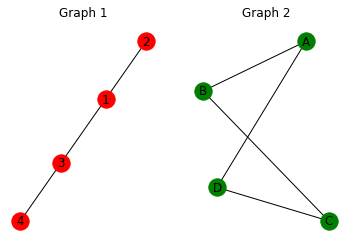

In [2]:
# Graphs to be used as visual aid for definition of paths
example1 = nx.Graph()
example1Connections = [('1', '2'), ('1', '3'), ('3', '4')]
example1.add_edges_from(example1Connections)

example2 = nx.Graph()
example2Connections = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')]
example2.add_edges_from(example2Connections)

plt.subplot(121)
plt.title('Graph 1')
nx.draw(example1, with_labels=True, node_color="red")

plt.subplot(122)
plt.title("Graph 2")
nx.draw(example2, with_labels=True, node_color="green")

plt.show()

Now that the tree has been defined, it is time to define what rooted means in this context: 

## Python implementation of the Heapsort

In [3]:
# Implementation of the Heapsort
# The functions used here were derived from the heapsort function on this page: https://www.geeksforgeeks.org/heap-sort/
def heap_sort(inputList): # The function for sorting lists is created here, the inputList is the list to sort
    length = len(inputList)
    
    numCompares = 0
    
    for i in range(length//2 - 1, -1, -1): # The max heap is created
        to_heap(inputList, length, i)
    
    for i in range(length-1, 0, -1): # The heap is reverted back to list form
        inputList[i], inputList[0] = inputList[0], inputList[i]
        to_heap(inputList, i, 0)

def to_heap(inputList, listLength, index): # A subtree is created with the index value being the root
    
    numCompares = 0
    
    root = index
    left = 2 * index + 1
    right = 2 * index + 2
    
     # The root must be larger than either of it's children, or it will be swapped with the larger child
    if left < listLength and inputList[root] < inputList[left]:
         root = left
        
    if right < listLength and inputList[root] < inputList[right]:
        root = right
    
    if root != index: # If the root has been changed and no longer matches, the index, the values stored at the new root and the index are swapped
        inputList[index], inputList[root] = inputList[root], inputList[index] # Values are swapped
        
        numCompares += to_heap(inputList, listLength, root) # The tree is recreated with the the new root
        
    return numCompares

        
testList = []
for i in range(0, 10):
    testList.append(rand.randint(1, 255))
print(testList)

heap_sort(testList)
print(testList)

[4, 193, 46, 239, 145, 208, 36, 117, 191, 137]
[4, 36, 46, 117, 137, 145, 191, 193, 208, 239]
